# Übung 6

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### In dieser Übung ...

... werden wir intensiv mit Dimensionsreduktion mittels Hauptkomponentenzerlegung (PCA) beschäftigen. Wir werden die PCA implementieren und damit verschiedene Datensätze untersuchen.

### 6.1 Eigengesichter (Bildkompression mittels PCA)

In den 90er Jahren haben Forscher des Olivetti Research Laboratory in Cambridge, basierend auf der PCA, eines der frühen Verfahren für Gesichtserkennung entwickelt. Das Olivetti Research Laboratory wurde wenige Jahre später von AT&T übernommen, und der [Datensatz](https://web.archive.org/web/20051104013331/http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html), auf dem die Arbeiten beruhten, wurde unter dem Namen *Olivetti Faces Dataset* weltweit bekannt.

Wir werden uns in dieser Übung mit dem Aspekt der Dimensionsreduktion mithilfe von PCA beschäftigen, und wie sie zur Datenkompression von Gesichtsbildern eingesetzt werden kann. Die PCA-Richtungen (Hauptkomponenten) eines Datensatzes von Gesichtsbildern werden auch *Eigengesichter* bzw. *Eigenfaces* genannt.

**Ihre Daten**

Die Olivetti Faces bestehen aus 400 Graustufenbildern (64x64 Pixel), die von 40 Personen stammen. Von jeder Person wurden 10 Gesichtsbilder angefertigt, wobei die Personen gebeten wurden, unterschiedliche Gesichtsausdrücke zu zeigen. Gleichzeitig wurde die Beleuchtung während der Fotoaufnahmen variiert.

* Importieren Sie den Datensatz durch das Ausführen der untenstehenden Code-Zelle.

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Import data
data: np.ndarray
targets: np.ndarray
data, targets = fetch_olivetti_faces(data_home="./", return_X_y=True)

**Ihre Aufgaben**

* Bei der Implementierung der PCA in den nachfolgenden Teilaufgaben nutzen Sie bitte ausschließlich *Numpy* und keine Funktionen von sklearn.

(1) Untersuchen Sie die Daten in `data`: 

* Nennen Sie die Anzahl der Samples (Gesichter) in diesem Datensatz.
* Nennen Sie die Anzahl der Features (Merkmale, Pixel) jedes Gesichts.
* Prüfen Sie, in welchem Wertebereich die Pixelwerte variieren und nennen Sie den Wertebereich.

In [30]:
print(f"{data.shape=}\n{data.max()=} bis {data.min()=}, {data.mean()=}")

data.shape=(400, 4096)
data.max()=1.0 bis data.min()=0.0, data.mean()=0.5470426


Im Datensatz sind 400 Samples mit je 4096 Features. Die Pixelwerte variieren um $0.547$ im Wertebereich von $[0, 1]$.

(2) Nutzen Sie Ihre Erkenntnisse aus (1) und visualisieren Sie das Gesicht 296 (0-basierte Zählung).

* Dabei kann Ihnen [dieser Befehl](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html?highlight=reshape#numpy.ndarray.reshape) und [jener Befehl](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) hilfreich sein. Wenn Sie `cmap=gray` verwenden, dann wird das Gesicht in Graustufen dargestellt.

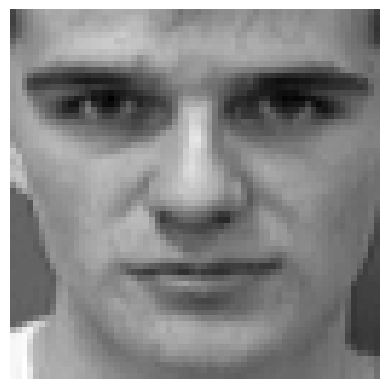

In [31]:
plt.imshow(data[296].reshape((64, 64)), cmap="gray")
plt.axis("off")
plt.show()

(3) Visualisieren Sie in einem [3x3 Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) die Gesichter 291 bis 299.

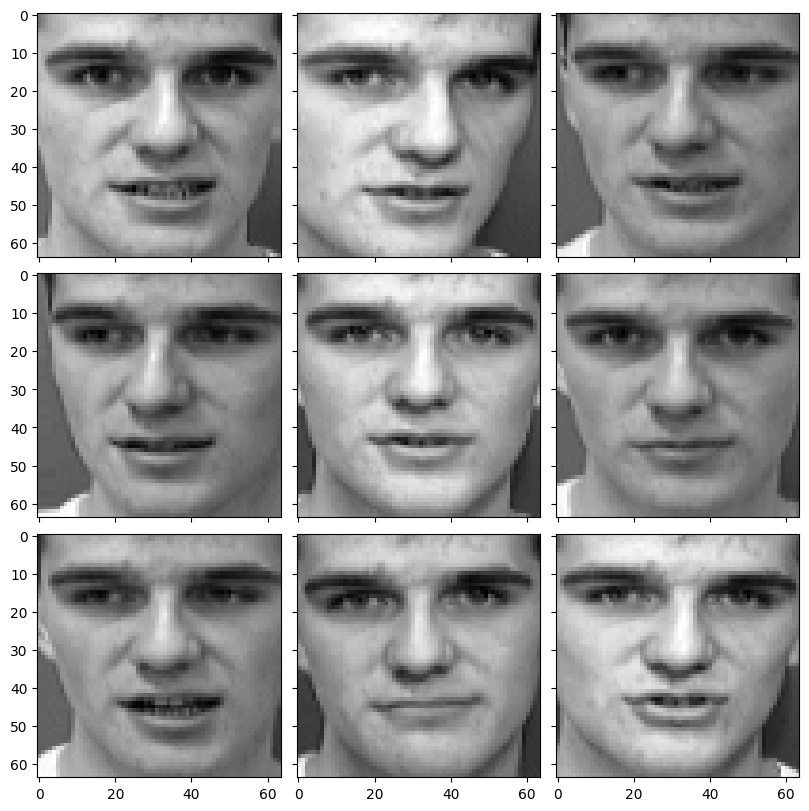

In [32]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, constrained_layout=True, figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[291 + i].reshape((64, 64)), cmap="gray")

plt.show()

(4) Nehmen Sie die Folien zur heutigen Vorlesung zur Hand und schlagen Sie nach, wie die PCA definiert ist.

* Überlegen Sie sich die Dimensionen der Kovarianzmatrix des Datensatzes und nennen Sie sie hier.

Die Dimension $D$ der Kovarianzmatrix $S$ ist die Anzahl der Features und nicht die Anzahl der Featurevektoren (Samples). $S\in \mathbb{R}^{4096\times 4096}$

(5) Bestimmen Sie die [Kovarianzmatrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) `cov_mat` des Datensatzes. Überprüfen Sie, ob die Dimensionen der Kovarianz mit Ihrer Erwartung aus Schritt (4) übereinstimmt.

* Hinweis: Eine typische Fehlerquelle besteht bei diesem Schritt darin, dass die Kovarianzmatrix nicht korrekt berechnet wird. Es ist daher wichtig, dass Sie wissen und überprüfen, ob die Dimensionen der Kovarianzmatrix stimmen.

In [33]:
cov_mat = np.cov(data, rowvar=False)
print(f"{cov_mat.shape=}")

cov_mat.shape=(4096, 4096)


(6) [Bestimmen](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) Sie nun die Eigenwerte `eig_vals` und Eigenvektoren `eig_vecs` Ihrer Kovarianzmatrix.

In [34]:
eig_vals, eig_vecs = np.linalg.eigh(np.cov(data, rowvar=False))

(7) Ein typischer Fehler ist es, anzunehmen, dass Ihre Eigenwerte sortiert vorliegen. Dies ist im Allgemeinen *nicht* der Fall. Daher sortieren Sie bitte die Eigenwerte in absteigender Größe. Nutzen Sie dafür [diesen Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html), um die Sortierung in eine separate Variable `idx` zu speichern, mit der Sie dann die Sortierung der Eigenwerte vornehmen.

* Beachten Sie, dass der Ihnen angegebene Befehl nicht in absteigender Reihenfolge (*descending order*) sortieren kann. Sortieren Sie also zunächst aufsteigend und kehren Sie dann die Reihenfolge im resultierenden Array um. 
* Falls Sie glauben, dass Ihre Eigenwerte schon sortiert vorliegen, ohne dass Sie sortieren müssen, prüfen Sie dies nach, indem Sie sich die Variable `idx` anschauen.

In [35]:
idx = np.argsort(eig_vals)[::-1]

(8) Sortieren Sie nun die assoziierten Eigenvektoren, die Sie im Array `eig_vecs` gespeichert hatten.
* Beachten Sie: Die Eigenvektoren liegen als Spalten in `eigen_vecs` vor, *nicht* als Zeilen. Dies können Sie auch in der [Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) nachschlagen. Das Verwechseln von Zeilen und Spalten ist eine typische Fehlerquelle.
* Nutzen Sie `idx`, um die Spalten (also die Eigenvektoren) so zu sortieren, dass sie zu Ihren sortierten Eigenwerten passen. Dazu können Sie [Integer Array Indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing) einsetzen. Für Integer Array Indexing müssen Sie Ihr Array `idx` [in eine Python Liste umwandeln](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html).

In [36]:
# eig_vals mit den Zeilen Indizis idx sortieren
# eig_vecs mit idx als Spalten Indizes sortieren und danach erst transponieren
eig_vals, eig_vecs = eig_vals[idx], eig_vecs[:, idx]

(9) Schlagen Sie in der Vorlesung nach, wie die *Proportion of Variance Explained* (PVE) definiert ist. 
* Bestimmen Sie die PVE als Funktion der PCA-Komponenten und visualisieren Sie sie.
* Visualisieren Sie ebenfalls die kumulative PVE als Funktion der PCA-Komponenten.
* Beschreiben Sie kurz den Verlauf der PVE in Ihren beiden Abbildungen. Wie interpretieren Sie diesen Verlauf? (1-2 Sätze)

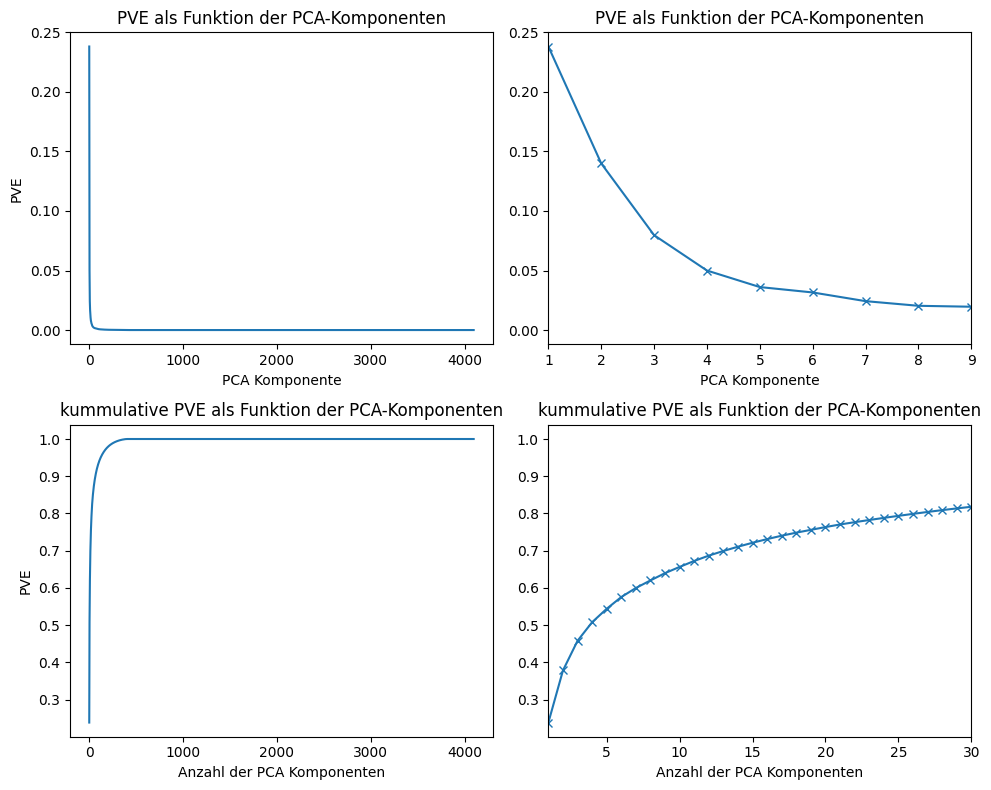

In [37]:
pve = eig_vals / eig_vals.sum()

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("PVE als Funktion der PCA-Komponenten")
plt.plot(np.arange(len(idx)) + 1, pve)
plt.ylabel("PVE")
plt.xlabel("PCA Komponente")

plt.subplot(2, 2, 2)
plt.title("PVE als Funktion der PCA-Komponenten")
plt.plot(np.arange(len(idx)) + 1, pve, marker="x")
plt.xlim(1, 9)
plt.xlabel("PCA Komponente")


plt.subplot(2, 2, 3)
plt.title("kummulative PVE als Funktion der PCA-Komponenten")
plt.plot(np.arange(len(idx)) + 1, np.cumsum(pve))
plt.ylabel("PVE")
plt.xlabel("Anzahl der PCA Komponenten")

plt.subplot(2, 2, 4)
plt.title("kummulative PVE als Funktion der PCA-Komponenten")
plt.plot(np.arange(len(idx)) + 1, np.cumsum(pve), marker="x")
plt.xlim(1, 30)
plt.xlabel("Anzahl der PCA Komponenten")

fig.tight_layout() 
plt.show()


Die Proportion of Variance Explained (PVE) ist der Bruchteil der Gesamtvarianz der Merkmale, die über die PCA-Komponenten repräsentiert wird.
$$
   \text{PVE}(j) = 
   \frac{\text{Var}(Z_j)}{\text{Var}_\text{total}} = 
   \frac{\lambda_j}{\sum_{i=1}^{D} \lambda_i}
$$

Die PVE der ersten PCA Komponente (nach Sortierung) ist sehr hoch und fällt dann rasch ab.

(10) Wir untersuchen nun die Hauptkomponenten der PCA.

* Visualisieren Sie das erste Eigengesicht (*eigenface*). Dies entspricht der 1. PCA-Komponente, also dem Eigenvektor der Kovarianzmatrix, der dem größten Eigenwert zugeordnet ist. Dieser Eigenvektor wird auch als "erster Eigenvektor" bezeichnet.

* Visualisieren Sie ebenfalls die Eigengesichter 2 bis 5.

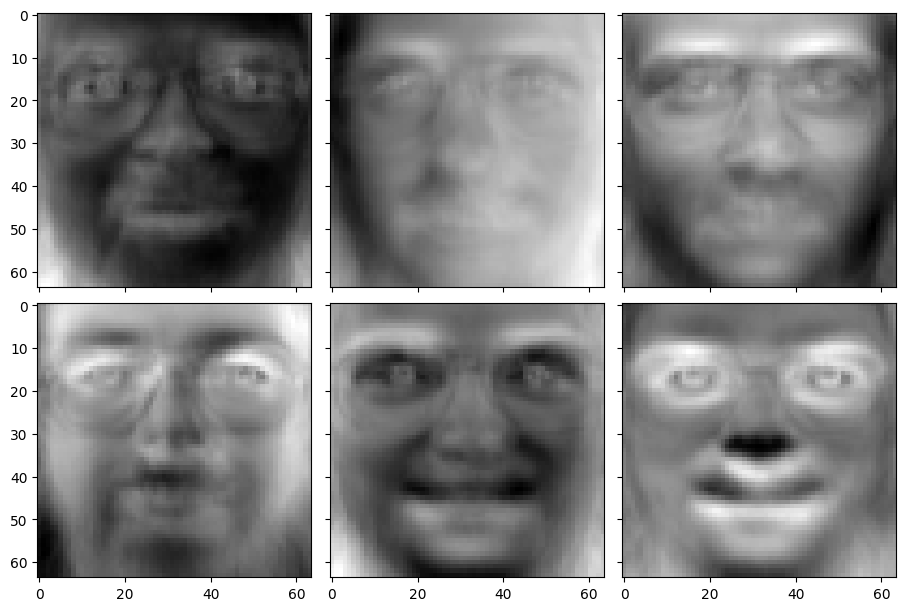

In [38]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, constrained_layout=True, figsize=(9, 6))

for i in range(6):
    plt.subplot(2, 3, i + 1)

    eigenface = eig_vecs[:, i]
    plt.imshow(eigenface.reshape((64, 64)), cmap="gray")

plt.show()

(11) Die PCA-Komponenten (Eigengesichter) stellen eine Basis dar, mit der sich die Gesichter im Olivetti-Datensatz darstellen lassen. Ihre Erkenntnisse aus Teilaufgabe (9) deuten darauf hin, dass zur Darstellung der Gesichter nicht alle Basisvektoren notwendig sein werden. Dies werden Sie hier untersuchen.

Seien $\vec{f}_1, \ldots, \vec{f}_k$ die PCA-Komponenten der $k$-größten Eigenwerte, und bezeichne $\vec{g}$ der Vektor, der das Gesicht 296 (0-basierte Zählung) darstellt. Projizieren Sie das Gesicht $\vec{g}$ auf die ersten 25 PCA-Komponenten (Eigengesichter). Sie erhalten dadurch 25 Koeffizienten $c_i$,

$$c_i = \vec{f}_i^\text{T}(\vec{g}-\vec{m}),$$

wobei $\vec{m}$ der Vektor der Mittelwerte über die Merkmale des gesamten Datensatzes ist. Denn: Vergessen Sie nicht, dass Sie Ihre Daten *vor* der Projektion zentrieren müssen (schlagen Sie die entsprechende Folie in der Vorlesung nach). Dies bedeutet, dass Sie von den Merkmalen (Pixeln) des Gesichts 296 jeweils die Mittelwerte (ermittelt über den ganzen Datensatz) abziehen müssen.
  
Bemerkung:

* Sie haben hier das Gesicht 296 mithilfe von 25 Koeffizienten beschrieben und damit mit einem Vektor in einem 25-dimensionalen Raum. Dieser Raum ist deutlich kleiner als der ursprüngliche Raum (Dimensionsreduktion!). 


In [39]:
data_centered = (data - data.mean(axis=0))
data_projected = data_centered[296][:, np.newaxis].T @ eig_vecs[:, 0:25]
data_projected.shape

(1, 25)

(12) Sie haben aus Teilaufgabe (11) 25 Koffizienten vorliegen, mit denen Sie - mithilfe der Eigengesichter - nun das Gesicht rekonstruieren werden. Rekonstruieren Sie das Gesicht aus den 25 Koeffizienten mithilfe der Eigengesichter,

$$\vec{g}^\prime = \left(\sum\limits_{i=1}^k c_i \vec{f}_k\right) + \vec{m},$$

wobei Sie auch hier sich daran erinnern, dass Sie für die Rekonstruktion nun den Mittelwertsvektor $\vec{m}$, den Sie in Teilschritt (11) abgezogen hatten, wieder aufaddieren müssen.

* Visualisieren Sie in einem Plot das ursprüngliche Gesicht (links) sowie das rekonstruierte Gesicht (rechts).

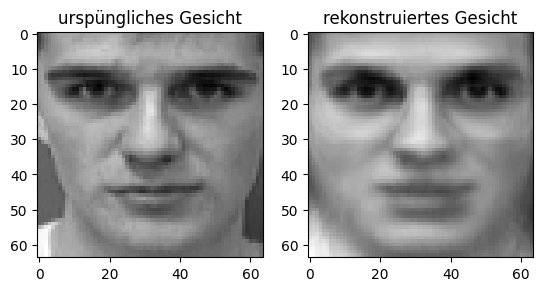

In [40]:
fig, ax = plt.subplots(1, 2)

# urspüngliches Gesicht
ax[0].imshow(data[296].reshape((64, 64)), cmap="grey")
ax[0].set_title("urspüngliches Gesicht")

# rekonstruiertes Gesicht
reconstructed_face = np.dot(data_projected , eig_vecs[:, 0:25].T) + data.mean(axis=0)
ax[1].imshow(reconstructed_face.reshape((64, 64)), cmap="grey")
ax[1].set_title("rekonstruiertes Gesicht")

plt.show()

(13) Experimentieren Sie mit einer größeren Anzahl von PCA-Komponenten und untersuchen Sie, wie sich die Projektion und die Rekonstruktion verbessert, wenn Sie die ersten 100 oder 200 PCA-Komponenten benutzen.

* Was beobachten Sie, wenn Sie die Anzahl der PCA-Komponenten erhöhen? (1-2 Sätze)

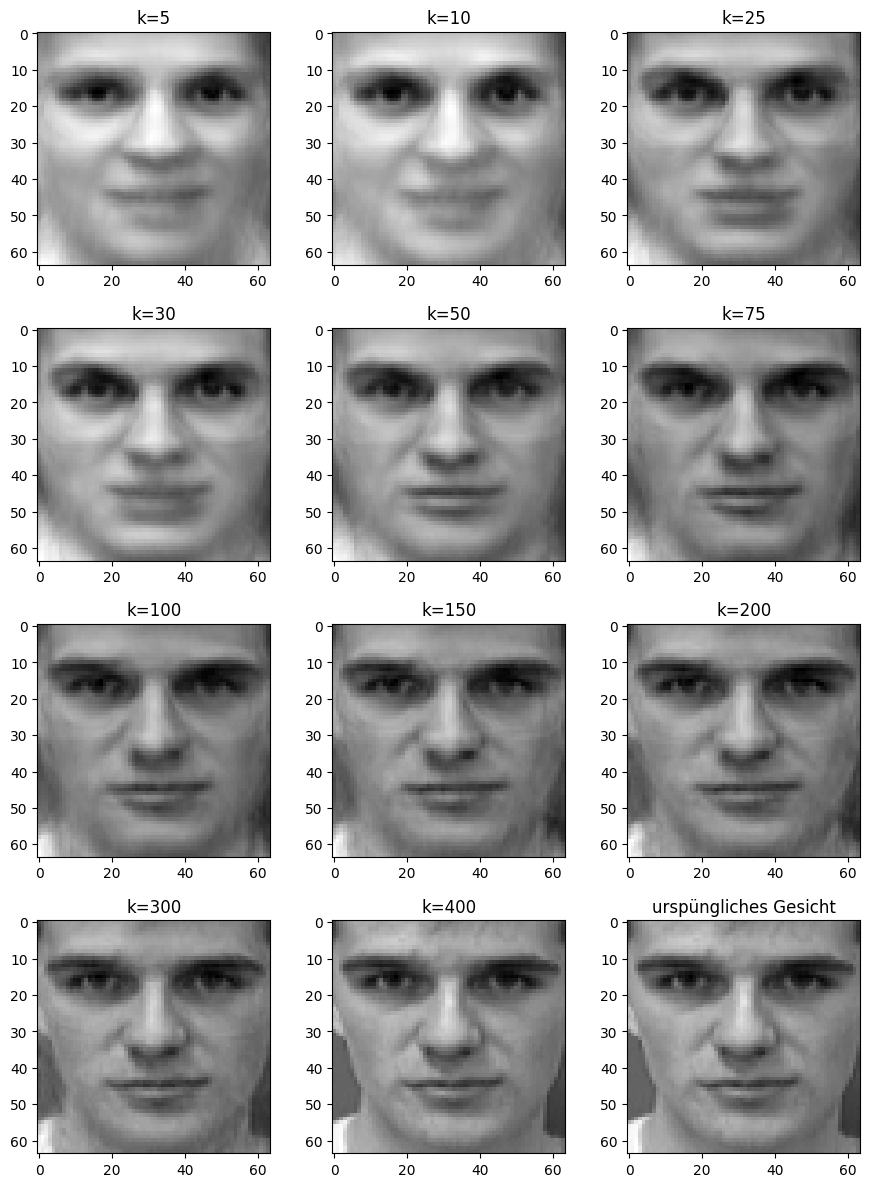

In [41]:
komponents = [5, 10, 25, 30, 50, 75, 100, 150, 200, 300, 400]

fig, ax = plt.subplots(4, 3, figsize=(9, 12))
fig.tight_layout()

for i, k in enumerate(komponents):
    data_projected = data_centered[296][:, np.newaxis].T @ eig_vecs[:, 0:k]
    reconstructed_face = np.dot(data_projected , eig_vecs[:, 0:k].T) + data.mean(axis=0)

    plt.subplot(4, 3, i+1)
    plt.imshow(reconstructed_face.reshape((64, 64)), cmap="grey")
    plt.title(f"k={k}")

plt.subplot(4, 3, 12)
plt.imshow(data[296].reshape((64, 64)), cmap="grey")
plt.title("urspüngliches Gesicht")

plt.show()

Das Gesicht wird immer besser erkennbar.

(14) Nehmen Sie an, wir würden PCA als Bildkompressionsmethode einsetzen. Überdenken Sie folgendes Gedankenexperiment: Wir projizieren jedes Gesicht auf die 200 größten PCA-Komponenten (Eigengesichter) und erhalten jeweils 200 Koeffizienten pro Gesicht. Wir speichern nun diese Koeffizienten sowie die 200 PCA-Komponentenvektoren in einer Datei ab.

* Wie groß (in Megabytes) ist der Originaldatensatz, wenn wir zur Speicherung jedes Pixels 8 Bytes nutzen?
* Wie groß (in Megabytes) wäre der projizierte Datensatz, der lediglich die 200 Eigengesichter, die 200 Koeffizienten pro Gesicht sowie den Mittelwertsvektor ($\vec{m}$) enthält? Wir nehmen auch in diesem Fall an, dass jedes Pixel und jeder Koeffizient 8 Bytes belegt.

- Im Datensatz sind 400 Gesichter erfasst, welche mit jeweils 4096 Pixeln und 8 Byte pro Pixel eine Größe von $400\cdot 4096 \cdot 8\ \text{Byte} = 13107200\ \text{Byte}$ oder rund $13.1\ \text{MB}$ ($12.5\ \text{MiB}$) belegen würden. 
- Nach Projektion werden nur noch 200 Koeffizienten pro Gesicht benötigt $400\cdot 200 \cdot 8\ \text{Byte} = 640 \text{kB}$, was deutlich weniger ist, als zuvor. Jedoch werden auch die 200 Eigengesichter und einen Mittelwertvektor benötigt $(200 + 1)\cdot 4096 \cdot 8 = 6586368\ \text{Byte}$, sodass insgesamt $7226368\ \text{Byte}$ oder ungefähr $7.23\ \text{MB}$ benötigt werden.

Dies entspricht einer Kompressionsrate von 55 %, bei einem relativ geringen Qualitätsverlust (s.o.).

(15) \[Optional\] Nutzen Sie [ipython Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html), um eine interaktive Visualisierung der Gesichter des Datensatzes sowie ihrer Rekonstruktion zu erstellen: Legen Sie zwei Slider an: Mit dem ersten Slider können sie die Nummer des zu visualisierenden Gesichtes im Datensatz einstellen. Mit dem zweiten Slider können Sie die Anzahl der PCA-Komponenten für die Projektion und anschließende Rekonstruktion einstellen. Das Widget soll das ursprüngliche Gesicht sowie das rekonstruierte Gesicht darstellen.

In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def show_face(face: int, pca_komponents: int):
    data_projected = data_centered[face][:, np.newaxis].T @ eig_vecs[:, 0:pca_komponents]
    reconstructed_face = np.dot(data_projected , eig_vecs[:, 0:pca_komponents].T) + data.mean(axis=0)
    
    plt.subplot(121)
    plt.imshow(data[face].reshape((64, 64)), cmap="grey")
    plt.title("urspüngliches Gesicht")
    
    plt.subplot(122)
    plt.imshow(reconstructed_face.reshape((64, 64)), cmap="grey")
    plt.title(f"k={pca_komponents}")
    plt.show()

interact(show_face, face=widgets.IntSlider(min=0, max=data.shape[0] - 1, step=1, value=296), pca_komponents=widgets.IntSlider(min=1, max=500, step=1, value=10))

interactive(children=(IntSlider(value=296, description='face', max=399), IntSlider(value=10, description='pca_…

<function __main__.show_face(face: int, pca_komponents: int)>

### 6.2 Kriminalitätsraten (EDA mithilfe der PCA)

In dieser Übung werden wir einen klassischen Datensatz untersuchen, der aus den USA stammt. Es handelt sich um eine Zusammenstellung der Kriminalitätsraten in verschiedenen Staaten der USA sowie um den Prozentsatz der Bevölkerung, der in urbanen Regionen lebt (*UrbanProp*) aus dem Jahr 1975. Bei den Kriminalitätsraten interessieren uns Morde (*murder*), Körperverletzungen (*assault*) sowie Vergewaltigungen (*rape*) pro 100000 Einwohner, aufgeschlüsselt nach US-Staaten. Der Datensatz stammt aus dem *World Almanac and Book of facts 1975* (Kriminalitätsraten) und den *Statistical Abstracts of the United States 1975* (Urbane Regionen).

**Ihre Daten**

* Sie finden den Datensatz, den Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/USArrests.csv).

**Ihre Aufgaben**

(1) Importieren Sie den Datensatz und verschaffen Sie sich einen Überblick darüber, welche Merkmale (Features) Ihr Datensatz aufweist.

In [15]:
import pandas as pd
df = pd.read_csv("USArrests.csv")
print(df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


(2) Führen Sie eine explorative Analyse durch (mit Mitteln der deskriptiven Statistik, Visualisierung und Werkzeugen zur Ermittlung von Zusammenhängen (Korrelationen)). Schreiben Sie (1-3 Sätze) Ihre Befunde auf.

In [16]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


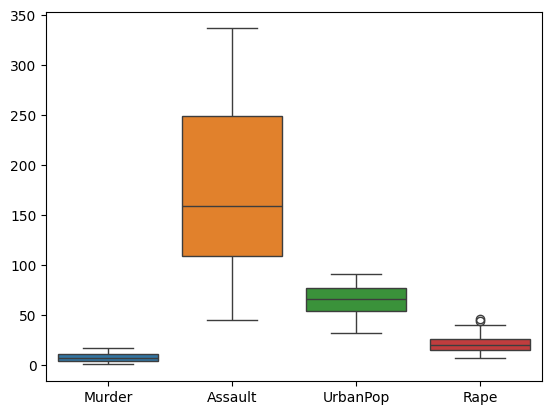

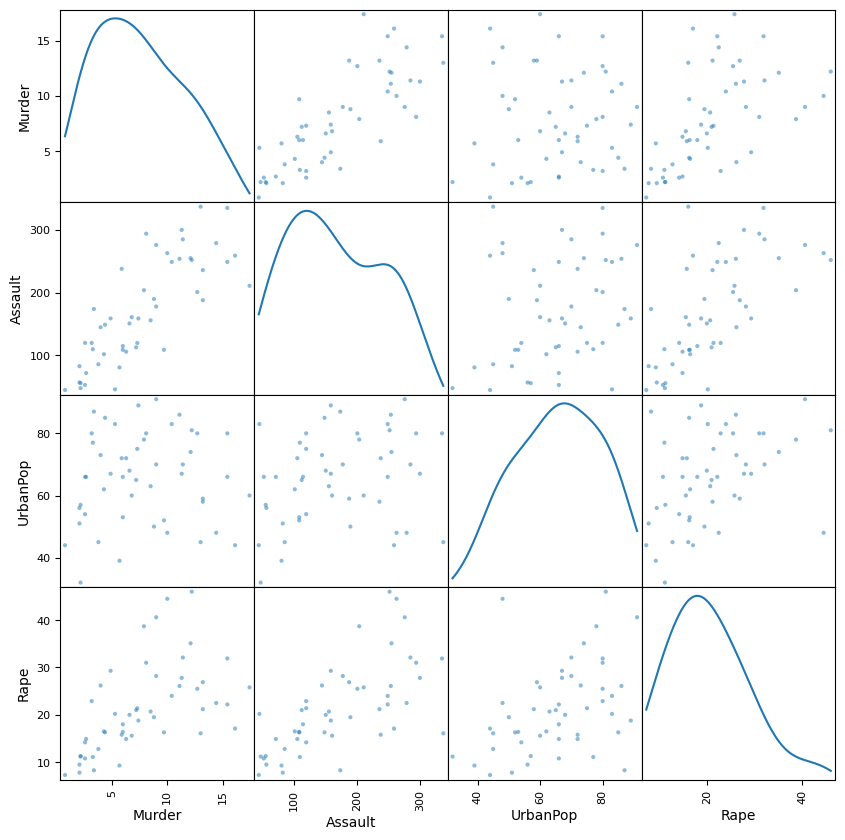

In [17]:
import seaborn as sns
sns.boxplot(df)
plt.show()

pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal="kde")
plt.show()

<Axes: >

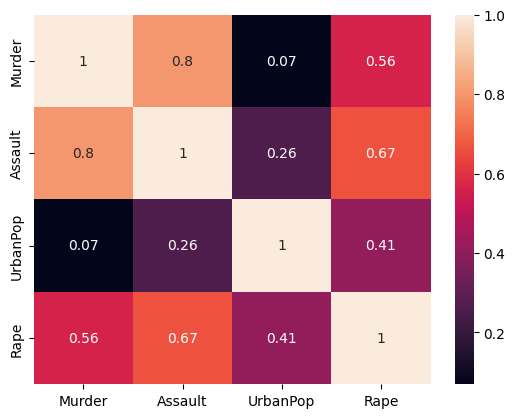

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, )

In [19]:
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Die Features _Murder_ und _Assault_ sind stark linear korreliert (Pearsons Korrelationskoeffizient $r \geq 0.8$). Bei _Rape_ besteht eine lineare Korrelation zu _Assault_ und _Murder_ von mittlerer Stärke.

(3) Ermitteln Sie die Varianz der Merkmale. Welche Unterschiede stellen Sie fest? (1-2 Sätze).

In [20]:
df.describe().loc['std']

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
Name: std, dtype: float64

Das Merkmal _Assault_ hat eine deutlich höhere Varianz als die übrigen Merkmale.

(4) Wir bereiten uns jetzt für eine Dimensionsreduktion per PCA vor. Klären Sie für sich zunächst: In welchen Skalen wurden die Merkmale gemessen? 

Die Merkmale _Assault, Rape, Murder_ sind in Fälle pro 100k Einwohner angegeben und _UrbanPop_ ist in Prozent angegeben.

(5) Welche Vorbereitungsmaßnahme ergibt sich für Sie aus Punkt (4)? Bereiten Sie Ihre Daten entsprechend vor.
* Wie sollten Sie Ihre Daten vor einer PCA transformieren?

In [21]:
df_z = df.set_index('Unnamed: 0')
# Standardisieren der Daten
df_z = (df_z - df_z.mean()) / df_z.std()

(6) Nutzen Sie Ihre Implementierung der PCA aus Aufgabe 6.1 und führen Sie die PCA durch. Ihr Produkt sind die Merkmale in den neuen PCA-Koordinaten.

In [22]:
eig_vals, eig_vecs = np.linalg.eigh(np.cov(df_z, rowvar=False))
idx = np.argsort(eig_vals)[::-1]
eig_vals, eig_vecs = eig_vals[idx], eig_vecs[:, idx]

(7) Implementieren Sie eine Funktion, die Ihnen die *Proportion of Variance Explained* (PVE) für ein gegebenes Merkmal berechnet. Schlagen Sie dazu in der Vorlesung nach, wie die PVE definiert ist.

In [23]:
pve = eig_vals / eig_vals.sum()
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

(8) Visualisieren Sie die PVE als Funktion der PCA-Komponente: Erstellen Sie einen Plot, der die PVE der ersten, zweiten, usw. Komponente der PCA anzeigt.

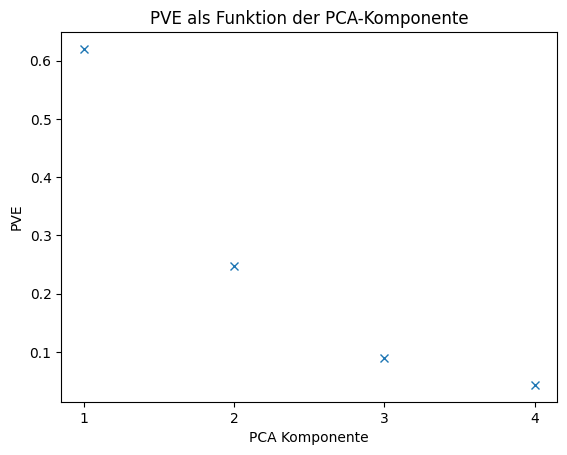

In [24]:
plt.title("PVE als Funktion der PCA-Komponente")
plt.plot(np.arange(len(idx)) + 1, pve, "x")
plt.ylabel("PVE")
plt.xlabel("PCA Komponente")
plt.xticks(np.arange(len(idx)) + 1)
plt.show()

(9) Ermitteln Sie die Anzahl der ersten PCA-Komponenten, mit deren Hilfe Sie etwas mehr als 85% der Gesamtvarianz erklären können. Notieren Sie sich diese Zahl.

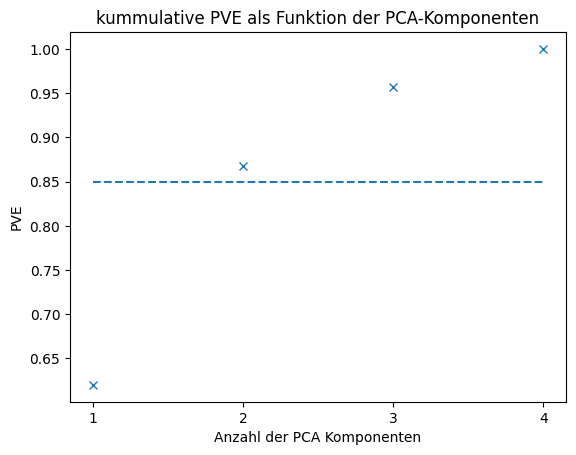

In [25]:
plt.title("kummulative PVE als Funktion der PCA-Komponenten")
plt.plot(np.arange(len(idx)) + 1, np.cumsum(pve), "x")
plt.ylabel("PVE")
plt.xlabel("Anzahl der PCA Komponenten")
plt.xticks(np.arange(len(idx)) + 1)
plt.hlines(y=0.85, xmin=1, xmax=4, linestyles="--")
plt.show()

(10) Für die aus Schritt (9) ermittelte Anzahl an PCA Komponenten betrachten Sie nun die assoziierten Richtungsvektoren: Listen Sie die Komponenten der Richtungsvektoren in einer Tabelle (z.B. einem DataFrame), in der jede Spalte einen Richtungsvektor enthält und die Zeilen den Richtungsvektorkomponenten entsprechen. Beschriften Sie die Zeilen mit den Namen der Merkmale Ihres Datensatzes.

In [26]:
pd.DataFrame(eig_vecs[:, 0:2], df_z.columns, columns=["u1", "u2"])

,u1,u2
Murder,-0.535899,0.418181
Assault,-0.583184,0.187986
UrbanPop,-0.278191,-0.872806
Rape,-0.543432,-0.167319


(11) Betrachten Sie nun Ihre Tabelle aus Schritt 10: Die Einträge der Richtungsvektoren entsprechen dem Gewicht, dem die PCA-Transformation dem entsprechenden Merkmal bei der Projektion auf die PCA-Richtung zuweist. Interpretieren Sie die Gewichte der 1. PCA Komponente: Welche Merkmale scheinen für die 1. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

Die Merkmale `Murder`, `Assault` und `Rape` spielt bei der Projektion auf die 1. PCA Komponente eine fast gleichermaßen wichtige Rolle, während das Merkmal `UrbanPop` eine geringere Bedeutung hat. 

(12) Interpretieren Sie die Gewichte der 2. PCA Komponente: Welche Merkmale scheinen für die 2. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

Bei der Projektion auf die 2. PCA Komponente ist besonders das Merkmal `UrbanPop` ausschlaggebend, während das Merkmale `Murder` eine kleine und die Merkmale `Assault` und `Rape` eine noch geringere Bedeutung haben.

(13) In Anbetracht Ihrer Beobachtungen aus Schritten (11) und (12): Welche Eigenschaften fasst die 1. PCA Komponente zusammen, welche die 2. PCA-Komponente? Welche ungefähren Namen würden Sie den PCA-Komponenten geben?

Die erste Komponente könnte man als `Violence Index` bezeichnen, da hier die `Assault`, `Rape` und `Murder` in einer sehr ähnlichen Gewichtung einfließen. Die zweite Komponente könnte man als `Urbanicity` bezeichnen, da hier `UrbanPop` die Hauptrolle spielt, auch wenn nach der Projektion nicht mehr der reine prozentuale Anteil dargestellt ist. 

(14) Visualisieren Sie die Daten in ihren in Schritt (9) ausgewählten PCA-Komponenten in einem Scatterplot. Beschriften Sie die Achsen mit den provisorischen Namen, die Sie ihnen in Schritt 13 gegeben haben.

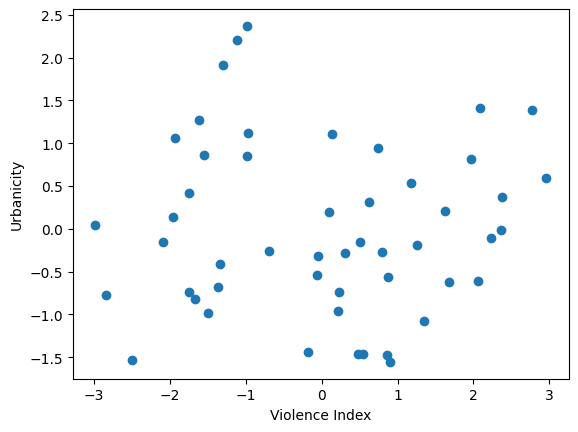

In [27]:
df_projected: pd.DataFrame = df_z @ eig_vecs[:, 0:2]
plt.scatter(df_projected[0], df_projected[1])
plt.xlabel("Violence Index")
plt.ylabel("Urbanicity")
plt.show()

### 6.3 z-scoring und PCA

In diesem Übungsteil werden wir uns noch einmal mit der PCA beschäftigen, allerdings dieses Mal auf konzeptioneller Ebene.

In der Vorlesung hatten wir die Kovarianzmatrix $S$ wie folgt definiert,

$$S = \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}}) (\mathbf{x}_n - \bar{\mathbf{x}})^T,$$

wobei $\mathbf{x}_n$ der Featurevektor des $n$-ten Datenpunktes und $\mathbf{\bar{x}}$ den Mittelwertsvektor über alle Datenpunkte bezeichnet.

**Ihre Aufgaben**

(1) Nutzen Sie die obige Definition von $S$ und berechnen Sie $S_{ij}$.

$$\begin{aligned}
S &= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}}) (\mathbf{x}_n - \bar{\mathbf{x}})^T \\
S_{ij} &= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_{n, i} - \bar{\mathbf{x}}_{i}) (\mathbf{x}_{n, j} - \bar{\mathbf{x}}_{j})\\
&= \begin{cases}
\frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_{n,i} - \bar{\mathbf{x}}_i)^2 & \text{für } i = j \\
\frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_{n,i} - \bar{\mathbf{x}}_i) (\mathbf{x}_{n,j} - \bar{\mathbf{x}}_j) & \text{für } i \neq j
\end{cases}\\
&= \begin{cases}
\text{Var}(\mathbf{x}_i) & \text{für } i = j \\
\text{Cov}(\mathbf{x}_i, \mathbf{x}_j) & \text{für } i \neq j
\end{cases}\\
\end{aligned}$$

(2) Zeigen Sie, dass $S$ symmetrisch ist, also das $S^\text{T} = S$. Diese Eigenschaft hatten wir im Beweis der PCA in der Vorlesung genutzt.

Da die Multiplikation invariant bzgl. Vertauschung der Argumente ist (Kommutativgesetz), gilt
$$\begin{aligned}
S_{ij} 
&= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_{n, i} - \bar{\mathbf{x}}_{i}) (\mathbf{x}_{n, j} - \bar{\mathbf{x}}_{j})\\
&= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_{n, j} - \bar{\mathbf{x}}_{j}) (\mathbf{x}_{n, i} - \bar{\mathbf{x}}_{i})\\
&= S_{ji}
\end{aligned}$$
und damit ist auch $S^T = S$.

(3) Wir verschieben nun den Mittelwert der $n$ Datenpunkte $\mathbf{x}_n$, in dem wir jeweils den Vektor $\mathbf{a} \neq \mathbf{0}$ auf alle Datenpunkte addiert, also: 
$$\tilde{\mathbf{x}}_n = \mathbf{x}_n + \mathbf{a}.$$
Bezeichne $S(\mathbf{x})$ die oben definierte Kovarianzmatrix und $S(\tilde{\mathbf{x}})$ die Kovarianzmatrix der transformierten Merkmale $\tilde{\mathbf{x}}_n$. Sind beide Matrizen unterschiedlich? Falls ja, warum? Falls nein, warum nicht?

Die Kovarianzmatrix ist invariant bzgl. Verschiebungen des Mittelwerts:

$$\begin{aligned}
S(\mathbf{\tilde{x}})
&= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{\tilde{x}}_n - \bar{\mathbf{\tilde{x}}}) (\mathbf{\tilde{x}}_n - \bar{\mathbf{\tilde{x}}})^T \\
&= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n + \mathbf{a} - (\bar{\mathbf{x}} + \mathbf{a})) (\mathbf{x}_n + \mathbf{a} - (\bar{\mathbf{x}} + \mathbf{a}))^T \\
&= \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}}) (\mathbf{x}_n - \bar{\mathbf{x}})^T \\
&= S(\mathbf{x})
\end{aligned}$$

(4) Welche Konsequenzen hat eine Verschiebung der Mittelwerte auf die Richtungen der PCA? Argumentieren Sie ausgehend von Ihren Beobachtungen in Schritt (3). (1-3 Sätze) 

Die Verschiebung der Mittelwerte um den Vektor $\mathbf{a}$ hat keine Auswirkung auf die Kovarianzmatirx und damit auch nicht auf die Richtungen der PCA, jedoch haben die Daten nach PCA Transformation einen Offset, wenn sie zuvor nicht zentriert wurden.

(5) In der Vorlesung wurde empfohlen, die Daten vor einer PCA zu zentrieren, sodass alle Merkmale Mittelwert $0$ haben. Welche Konsequenzen hat dies für die Richtungen der PCA? Orientieren Sie sich an Ihrer Antwort in Schritt (4).

Die Zentierung hat keine Auswirkung auf die Richtungen der PCA.

(6) Betrachten Sie zwei Szenarien: (a) Sie zentrieren Ihre Datenpunkte vor der Projektion auf die Richtungen der PCA. (b) Sie zentrieren Ihre Datenpunkte *nicht* vor der Projektion auf die Richtungen der PCA. Werden Sie in beiden Fällen dieselben PCA-Koordinaten Ihrer Datenpunkte erhalten? Falls ja, warum? Falls nein, warum nicht?

Die PCA-Koordinaten werden typischerweise einen Offset haben, wenn die Datenpunkte vor der Projektion nicht zentriert wurden. 

(7) Nehmen wir an, dass Sie Ihre Merkmale standardisieren (also ein z-scoring durchführen). Betrachten Sie nun die Kovarianzmatrix $S$, wie sie zu Beginn der Aufgabe definiert ist. Diese Matrix $S$ entspricht einer weiteren Matrix, die Sie bereits kennen. Um welche Matrix handelt es sich?

Nach Standardisierung der Kovarianzmatrix $S$ entspricht diese der Pearson-Korrelationsmatrix.  